<a href="https://colab.research.google.com/github/JorgeICS/Primeos_Analisis_Geopandas/blob/main/Busqueda_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
cf_totales_x_estado=gpd.read_file('/content/drive/MyDrive/Carreteras_federales_porEstado/cf_totales_x_estado.shp')

In [ ]:
from shapely.geometry import MultiLineString, LineString, Point

In [ ]:
def extract_points(geom):
    points = []
    if geom.geom_type == 'MultiLineString':
        for line in geom.geoms:  # Usar geom.geoms para iterar sobre las líneas
            points.extend([Point(coord) for coord in line.coords])
    elif geom.geom_type == 'LineString':
        points = [Point(coord) for coord in geom.coords]
    return points

In [ ]:
cf_totales_x_estado['points'] = cf_totales_x_estado['geometry'].apply(lambda geom: extract_points(geom))

In [ ]:
sin_ID=cf_totales_x_estado.loc[cf_totales_x_estado['NOMBRE'].str.len()==3]

In [ ]:
sin_ID.shape

(1004, 25)

In [ ]:
cf_con_ID=cf_totales_x_estado.loc[cf_totales_x_estado['NOMBRE'].str.len()>3]

In [ ]:
cf_con_ID.shape

(115081, 25)

In [ ]:
columnas_originales=cf_totales_x_estado.columns
nuevos_ID= pd.DataFrame(columns=columnas_originales)
nuevos_ID.shape

(0, 25)

In [ ]:
#Premicia de ESTADO
columna1 = 'points'
sin_ID_indices = sin_ID.index.tolist()  # Obtener la lista de índices para evitar problemas durante la iteración

while sin_ID.shape[0] > 0:  # Continuar mientras haya filas en sin_ID
    for idx in sin_ID_indices:
        if idx not in sin_ID.index:
            continue  # Saltar si la fila ya fue eliminada

        row = sin_ID.loc[idx]
        match_found = False

        for i, points_list in cf_con_ID[columna1].items():
          if row['Estado'] == cf_con_ID.loc[i, 'Estado']: # Premicia de ESTADO
            for point in row[columna1]:# Iterar sobre cada punto en la lista de puntos
              if any(point.equals(p) for p in points_list):
                # Obtener los valores de 'NOMBRE' y 'CODIGO' de cf_con_ID de los puntos que coinciden
                nombre_nuevo = cf_con_ID.loc[i, 'NOMBRE']
                codigo_nuevo = cf_con_ID.loc[i, 'CODIGO']
                # Actualizar sin_ID con los valores nuevos
                sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
                sin_ID.at[idx, 'CODIGO'] = codigo_nuevo
                # Copiar toda la fila de sin_ID
                nueva_fila = row.copy()
                # Modificar solo las columnas necesarias
                nueva_fila['NOMBRE'] = nombre_nuevo
                nueva_fila['CODIGO'] = codigo_nuevo

                # Agregar la fila actualizada a cf_con_ID
                cf_con_ID = pd.concat([cf_con_ID, nueva_fila.to_frame().T])
                nuevos_ID = pd.concat([nuevos_ID, nueva_fila.to_frame().T])

                # Eliminar la fila de sin_ID inmediatamente
                sin_ID.drop(idx, inplace=True)
                match_found = True
                break
            if match_found:
                break

        # Recalcular los índices para asegurarse de que el ciclo while esté actualizado
        sin_ID_indices = sin_ID.index.tolist()


<ipython-input-61-41bfbaf4a279>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_ID.drop(idx, inplace=True)
<ipython-input-61-41bfbaf4a279>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_ID.drop(idx, inplace=True)
<ipython-input-61-41bfbaf4a279>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_ID.drop(idx, inplace=True)
<ipython-input-61-41bfbaf4a279>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy o

KeyboardInterrupt: 

In [ ]:
#Premicia de ESTADO
columna1 = 'points'
sin_ID_indices = sin_ID.index.tolist()  # Obtener la lista de índices para evitar problemas durante la iteración

while sin_ID.shape[0] > 0:  # Continuar mientras haya filas en sin_ID
    for idx in sin_ID_indices:
        if idx not in sin_ID.index:
            continue  # Saltar si la fila ya fue eliminada

        row = sin_ID.loc[idx]
        match_found = False

        for i, points_list in cf_con_ID[columna1].items():
            # Verificar si los 'Estado' son iguales antes de comparar puntos
            if row['Estado'] == cf_con_ID.loc[i, 'Estado']:
                for point in row[columna1]:  # Iterar sobre cada punto en la lista de puntos
                    if any(point.equals(p) for p in points_list):  # Comparar cada punto
                        # Obtener los valores de 'NOMBRE' y 'CODIGO' de cf_con_ID
                        nombre_nuevo = cf_con_ID.loc[i, 'NOMBRE']
                        codigo_nuevo = cf_con_ID.loc[i, 'CODIGO']

                        # Actualizar sin_ID con los valores nuevos
                        sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
                        sin_ID.at[idx, 'CODIGO'] = codigo_nuevo

                        # Copiar toda la fila de sin_ID
                        nueva_fila = row.copy()
                        # Modificar solo las columnas necesarias
                        nueva_fila['NOMBRE'] = nombre_nuevo
                        nueva_fila['CODIGO'] = codigo_nuevo

                        # Agregar la fila actualizada a cf_con_ID
                        cf_con_ID = pd.concat([cf_con_ID, nueva_fila.to_frame().T])
                        nuevos_ID = pd.concat([nuevos_ID, nueva_fila.to_frame().T])

                        # Eliminar la fila de sin_ID inmediatamente
                        sin_ID.drop(idx, inplace=True)
                        match_found = True
                        break  # Salir del bucle si se encontró una coincidencia
                if match_found:
                    break

        # Recalcular los índices para asegurarse de que el ciclo while esté actualizado
        sin_ID_indices = sin_ID.index.tolist()


KeyboardInterrupt: 

In [ ]:
sin_ID

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,Estado,geometry,points
10361,295487,Carretera,N/D,N/D,Con pavimento,Concreto,2,Habilitado,En operación,0,...,40,1255041,1023410,598.871857,6.0,2020-07-27 14:08:49,Definida,Campeche,"LINESTRING (3742234.928 978515.885, 3742230.56...","[POINT (3742234.92812727 978515.8854008858), P..."
10362,625173,Carretera,N/D,N/D,Con pavimento,Concreto,2,Habilitado,En operación,0,...,40,1254947,1255041,13.866824,6.0,2020-07-27 13:53:22,Definida,Campeche,"LINESTRING (3742234.666 978529.750, 3742234.92...","[POINT (3742234.6663764995 978529.7497541389),..."
10363,295469,Carretera,N/D,N/D,Con pavimento,Concreto,2,Habilitado,En operación,0,...,40,1254948,1254947,9.108420,6.0,2020-07-27 15:14:00,Definida,Campeche,"LINESTRING (3742234.593 978538.858, 3742234.66...","[POINT (3742234.593036212 978538.8578788905), ..."
10364,625169,Carretera,N/D,N/D,Con pavimento,Concreto,2,Habilitado,En operación,0,...,40,1254985,1254948,15.577587,6.0,2020-07-28 11:24:34,Definida,Campeche,"LINESTRING (3742234.092 978554.427, 3742234.59...","[POINT (3742234.091825038 978554.4274009914), ..."
10367,295474,Carretera,N/D,N/D,Con pavimento,Concreto,2,Habilitado,En operación,0,...,40,1254984,1254985,590.370816,6.0,2020-07-27 12:36:25,Definida,Campeche,"LINESTRING (3742241.150 979144.755, 3742238.07...","[POINT (3742241.1502227434 979144.7553981877),..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115893,352546,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,1430686,1430159,59.006515,6.0,2017-05-15 11:03:57,Definida,Zacatecas,"LINESTRING (2561874.097 1398195.611, 2561866.5...",[POINT (2561874.0972029446 1398195.6111764463)...
115896,352238,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,1430685,1430686,116.123788,6.0,2017-05-15 10:55:20,Definida,Zacatecas,"LINESTRING (2561952.556 1398280.486, 2561935.3...","[POINT (2561952.556057855 1398280.4861591877),..."
116047,354588,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,1,...,80,1431241,1432435,49.563633,8.0,2013-01-23 14:59:07,Definida,Zacatecas,"LINESTRING (2448322.082 1221795.389, 2448371.2...","[POINT (2448322.082434786 1221795.3887846563),..."
116048,354415,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,1,...,80,1430161,1431241,355.167431,8.0,2013-01-23 10:41:13,Definida,Zacatecas,"LINESTRING (2447970.733 1221847.197, 2448093.1...","[POINT (2447970.733088085 1221847.1969531449),..."


In [ ]:
nuevos_ID

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,Estado,geometry,points
1507,1176212,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Concreto,2,Habilitado,En operación,0,...,40,1363073,1892705,35.936246,7.0,2017-10-24 16:08:34,Definida,Baja California,LINESTRING (1322620.8883462609 1820231.9194758...,[POINT (1322620.8883462609 1820231.9194758113)...
2385,428160,Carretera,Ramal a Observatorio San Pedro Mártir,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1363080,1362998,177.798696,6.0,2012-12-03 11:10:47,Definida,Baja California,LINESTRING (1202946.4471782038 2164585.3616898...,[POINT (1202946.4471782038 2164585.3616898325)...
3414,2389932,Carretera,Sonoita - Mexicali,2,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,207143,207144,4.748316,6.0,2020-01-29 14:15:11,Definida,Baja California,LINESTRING (1286086.893411562 2325056.79826246...,"[POINT (1286086.893411562 2325056.7982624695),..."
3415,423910,Carretera,Sonoita - Mexicali,2,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,207144,207145,4.800367,6.0,2020-01-29 09:45:41,Definida,Baja California,LINESTRING (1286088.9187007472 2325061.0929928...,"[POINT (1286088.9187007472 2325061.092992882),..."
3416,2389933,Carretera,Sonoita - Mexicali,2,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,207145,207146,2.230006,6.0,2020-01-29 10:09:26,Definida,Baja California,LINESTRING (1286090.9660842984 2325065.4348520...,"[POINT (1286090.9660842984 2325065.434852066),..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37570,15020,Carretera,Zihuatanejo - La Mira,200,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,2984,1490451,45.877789,7.0,2020-10-12 11:37:18,Definida,Guerrero,LINESTRING (2530296.5196056277 649628.10191047...,"[POINT (2530296.5196056277 649628.1019104725),..."
37571,12282,Carretera,Zihuatanejo - La Mira,200,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1490451,1490452,94.412797,6.5,2019-08-20 09:30:40,Definida,Guerrero,LINESTRING (2530310.9345549815 649584.55321031...,"[POINT (2530310.9345549815 649584.5532103118),..."
37700,14775,Carretera,Zihuatanejo - La Mira,200,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,2983,2984,96.604782,7.0,2020-10-12 14:15:41,Definida,Guerrero,LINESTRING (2530270.780981621 649721.202792648...,"[POINT (2530270.780981621 649721.2027926486), ..."
37738,13708,Carretera,Zihuatanejo - La Mira,200,Con pavimento,Asfalto,1,Habilitado,En operación,0,...,60,1490191,1491225,97.298915,4.5,2020-10-12 12:42:38,Definida,Guerrero,LINESTRING (2514237.626704823 662856.131691636...,"[POINT (2514237.626704823 662856.1316916369), ..."


In [ ]:
cm=nuevos_ID[nuevos_ID['Estado']=='Campeche']

<Axes: >

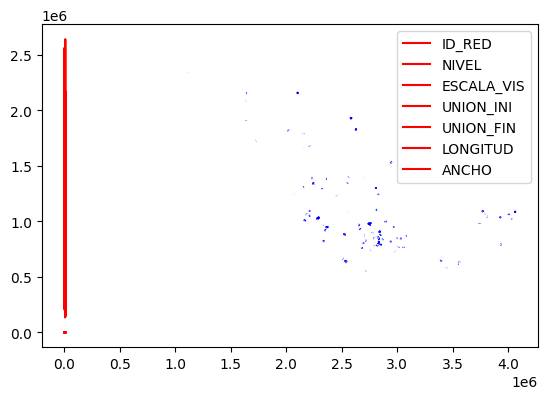

In [ ]:
axis=nuevos_ID.plot(color='red')
sin_ID.plot(ax=axis,color='blue')

<Axes: >

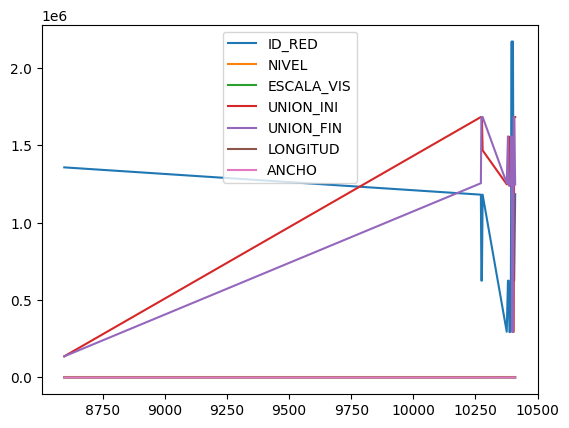

In [ ]:
cm.plot()

<Axes: >

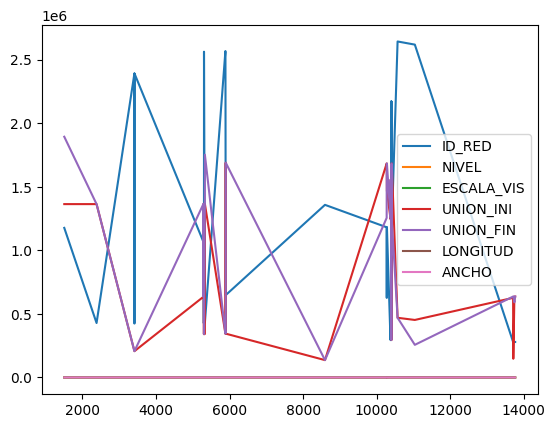

In [ ]:
nuevos_ID.plot(column='geometry')

In [ ]:
# quitar todas las columnas menos NOMBRE ,CODIGO,ID_RED,geometry

cf_con_ID = cf_con_ID[['NOMBRE', 'CODIGO', 'ID_RED', 'geometry']]


In [ ]:
cf_con_ID = cf_con_ID.dissolve(
     by=['NOMBRE','CODIGO'],
     aggfunc={
         'ID_RED' : 'count'
     },
 )

<Axes: >

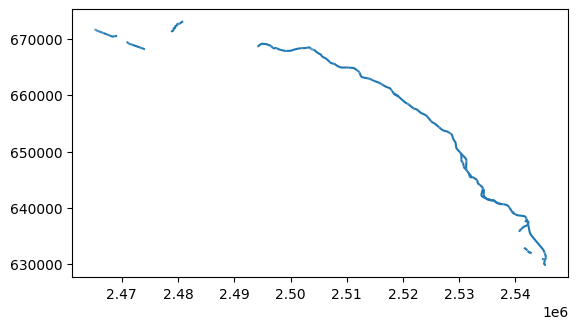

In [ ]:
cf_con_ID[cf_con_ID['NOMBRE']=='Zihuatanejo - La Mira'].plot()

In [ ]:
cf_con_ID.shape

(115257, 25)